In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json

In [12]:
#데이터 불러오기
os.chdir(r'C:\Users\injoo\광주 인공지능 사관학교\로테이션\자연어처리&추천시스템 김준태\미니프로젝트\Dataset')
us_videos = pd.read_csv("USvideos.csv")
us_videos_json = pd.read_json("US_category_id.json")

In [36]:
us_videos.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In [54]:
us_videos.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


### category_id 가 정수로 인코딩 되어있다. json 파일에서 읽어와서 딕셔너리에 "정수":"제목" 형식으로 저장하자

In [39]:
#  category_id가 뭔지 가져오는 코드
id_title_dict = {}
items_list =  us_videos_json["items"]
for i, key in enumerate(items_list):
    id_title_dict[int(key["id"])] = key["snippet"]["title"]


print(id_title_dict)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


### EDA 를 해보자!

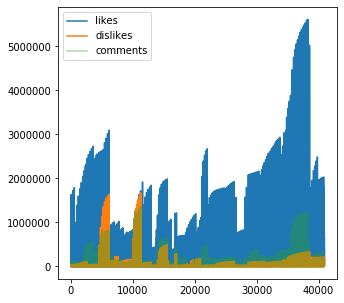

In [75]:
plt.figure(figsize=(5,5))
plt.plot(us_videos['likes'], label="likes")
plt.plot(us_videos['dislikes'], label="dislikes")
plt.plot(us_videos['comment_count'], label="comments", alpha=0.4)
plt.legend()

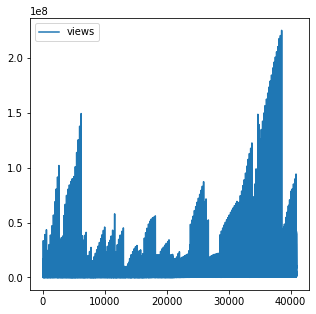

In [76]:
plt.figure(figsize=(5,5))
plt.plot(us_videos['views'], label="views")
plt.legend()

In [77]:
# view랑 like랑 대략 상관관계가 있는듯해 보인다

### 결측치가 있는지 확인해보자!

In [84]:
us_videos.isnull().sum()
# description만 570개가 빠져있고, 그외 결측치는 없는 것을 알 수 있다 -> 결측치 제거는 필요 없어보임

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

### 'video_error_or_removed' 'comments_disabled' 'ratings_disabled'가 만약 True라면 당연히 views likes dislikes가 떨어질 것이다. 예외사항들이니 이 데이터들을 제거해주자

In [89]:
us_videos = us_videos[us_videos['video_error_or_removed']==False]
us_videos = us_videos[us_videos['comments_disabled']==False]
us_videos = us_videos[us_videos['ratings_disabled']==False]

In [90]:
us_videos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40230 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40230 non-null  object
 1   trending_date           40230 non-null  object
 2   title                   40230 non-null  object
 3   channel_title           40230 non-null  object
 4   category_id             40230 non-null  int64 
 5   publish_time            40230 non-null  object
 6   tags                    40230 non-null  object
 7   views                   40230 non-null  int64 
 8   likes                   40230 non-null  int64 
 9   dislikes                40230 non-null  int64 
 10  comment_count           40230 non-null  int64 
 11  thumbnail_link          40230 non-null  object
 12  comments_disabled       40230 non-null  bool  
 13  ratings_disabled        40230 non-null  bool  
 14  video_error_or_removed  40230 non-null  bool  
 15  de